# SARCASM WITH CONVOLUTIONAL AND LSTM

## Import Module

In [13]:
import numpy as np
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

## Pendeklarasian Text

In [14]:
file_path = r'C:\Users\muhammadalfarizi\Documents\MyNotebook\NLP\BigData\sarcasm.json'

In [15]:
with open(file_path, 'r') as files:
    datastore = json.load(files)

## Pembentukan Data Set untuk Data dan Label

In [16]:
himp_kalimat = []
himp_label = []

for satuan_item in datastore:
    himp_kalimat.append(satuan_item['headline'])
    himp_label.append(satuan_item['is_sarcastic'])

Splitting Data Training dan Testing

In [17]:
print(len(himp_kalimat))

26709


In [18]:
VOCAB_SIZE = 1000
EMBEDDING_DIM = 16
MAX_LENGTH = 120
TRUNC_TYPE = 'post'
PADDING_TYPE = 'post'
OOV_TOKEN = 'asing'
TRAINING_SIZE = 20000
NUM_EPOCHS = 10

In [19]:
kalimat_training = himp_kalimat[:TRAINING_SIZE]
label_training = himp_label[:TRAINING_SIZE]

kalimat_testing = himp_kalimat[TRAINING_SIZE:]
label_testing = himp_label[TRAINING_SIZE:]

## Tokenisasi

URUTAN :

1. set dulu tokenizernya dengan instansiasi objek tokenizer dengan parameter num_words(jumlah vocab) dan oov_token

2. gunakan fit_on_texts untuk menyesuaikan objek tokenizer yang dibuat dengan kalimat training

3. berikan word index pada objek tokenizer

4. ubah text jadi sequences dengan memberikan method texts_to_sequences pada objek tokenizer yang sudah di fit dengan data training

5. padding untuk menyamakan panjang setiap array pada data training dengan menginstansiasi objek pad_sequences dengan parameter(data training yang sudah di sekuensi, maxlen yaitu maksimal length dari setiap array, tipe padding, tipe truncat

In [20]:
tokenizer = Tokenizer(num_words = VOCAB_SIZE, oov_token = OOV_TOKEN)
tokenizer.fit_on_texts(kalimat_training)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(kalimat_training)
testing_sequences = tokenizer.texts_to_sequences(kalimat_testing)

padded_training = pad_sequences(
    training_sequences, 
    maxlen = MAX_LENGTH, 
    padding = PADDING_TYPE, 
    truncating = TRUNC_TYPE
)

padded_testing = pad_sequences(
    testing_sequences, 
    maxlen = MAX_LENGTH, 
    padding = PADDING_TYPE,
    truncating = TRUNC_TYPE
)

## MODELLING NEURAL NETWORK

In [21]:
model_lstm_adam = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        VOCAB_SIZE,
        EMBEDDING_DIM,
        input_length = MAX_LENGTH
    ),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32)
    ),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_conv_adam = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        VOCAB_SIZE,
        EMBEDDING_DIM,
        input_length = MAX_LENGTH
    ),
    tf.keras.layers.Conv1D(
        128,
        5,
        activation = 'relu'
    ),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_lstm_sgd = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        VOCAB_SIZE,
        EMBEDDING_DIM,
        input_length = MAX_LENGTH
    ),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32)
    ),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_conv_sgd = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        VOCAB_SIZE,
        EMBEDDING_DIM,
        input_length = MAX_LENGTH
    ),
    tf.keras.layers.Conv1D(
        128,
        5,
        activation = 'relu'
    ),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_lstm_rms = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        VOCAB_SIZE,
        EMBEDDING_DIM,
        input_length = MAX_LENGTH
    ),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32)
    ),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_conv_rms = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        VOCAB_SIZE,
        EMBEDDING_DIM,
        input_length = MAX_LENGTH
    ),
    tf.keras.layers.Conv1D(
        128,
        5,
        activation = 'relu'
    ),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [22]:
model_lstm_adam.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model_conv_adam.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model_lstm_sgd.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model_conv_sgd.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model_lstm_rms.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model_conv_rms.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [23]:
padded_training = np.array(padded_training, dtype = float)
padded_testing = np.array(padded_testing, dtype = float)

label_training = np.array(label_training)
label_testing = np.array(label_testing)

In [24]:
history_lstm_adam = model_lstm_adam.fit(
    padded_training, label_training,
    epochs = NUM_EPOCHS,
    validation_data = (
        padded_testing,
        label_testing
    ),
    verbose = 1
)

history_conv_adam = model_conv_adam.fit(
    padded_training, label_training,
    epochs = NUM_EPOCHS,
    validation_data = (
        padded_testing,
        label_testing
    ),
    verbose = 1
)

history_lstm_sgd = model_lstm_sgd.fit(
    padded_training, label_training,
    epochs = NUM_EPOCHS,
    validation_data = (
        padded_testing,
        label_testing
    ),
    verbose = 1
)

history_conv_sgd = model_conv_sgd.fit(
    padded_training, label_training,
    epochs = NUM_EPOCHS,
    validation_data = (
        padded_testing,
        label_testing
    ),
    verbose = 1
)

history_lstm_rms = model_lstm_rms.fit(
    padded_training, label_training,
    epochs = NUM_EPOCHS,
    validation_data = (
        padded_testing,
        label_testing
    ),
    verbose = 1
)

history_conv_rms = model_conv_rms.fit(
    padded_training, label_training,
    epochs = NUM_EPOCHS,
    validation_data = (
        padded_testing,
        label_testing
    ),
    verbose = 1
)

Epoch 1/10
625/625 [==============================] - 41s 59ms/step - loss: 0.5474 - accuracy: 0.6876 - val_loss: 0.3822 - val_accuracy: 0.8250
Epoch 2/10
625/625 [==============================] - 36s 58ms/step - loss: 0.3444 - accuracy: 0.8428 - val_loss: 0.3732 - val_accuracy: 0.8280
Epoch 3/10
625/625 [==============================] - 36s 58ms/step - loss: 0.3117 - accuracy: 0.8642 - val_loss: 0.3709 - val_accuracy: 0.8320
Epoch 4/10
625/625 [==============================] - 36s 57ms/step - loss: 0.2999 - accuracy: 0.8699 - val_loss: 0.3838 - val_accuracy: 0.8210
Epoch 5/10
625/625 [==============================] - 36s 57ms/step - loss: 0.2908 - accuracy: 0.8724 - val_loss: 0.3762 - val_accuracy: 0.8305
Epoch 6/10
625/625 [==============================] - 36s 57ms/step - loss: 0.2829 - accuracy: 0.8749 - val_loss: 0.3812 - val_accuracy: 0.8314
Epoch 7/10
625/625 [==============================] - 35s 56ms/step - loss: 0.2817 - accuracy: 0.8780 - val_loss: 0.3864 - val_accuracy:

In [31]:
def drawGraph (title, history, string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_"+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, "val"+string])
    plt.title(title)
    
    plt.show()

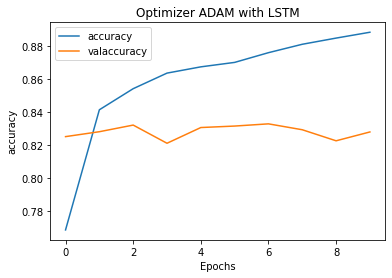

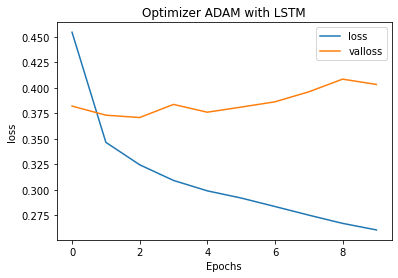

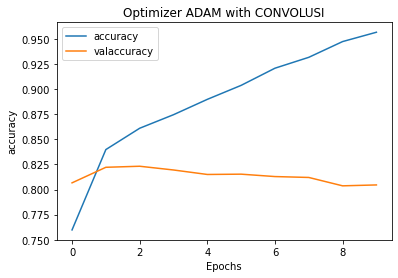

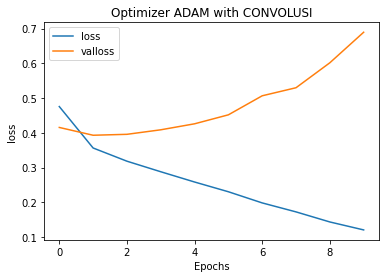

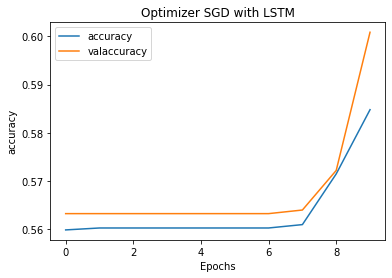

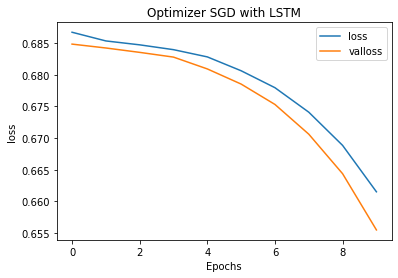

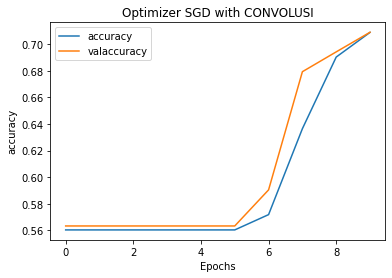

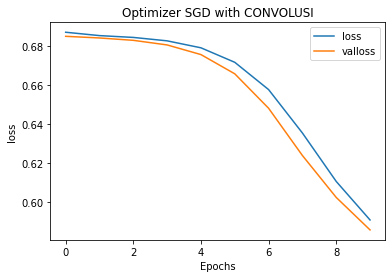

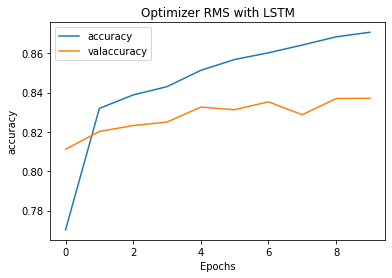

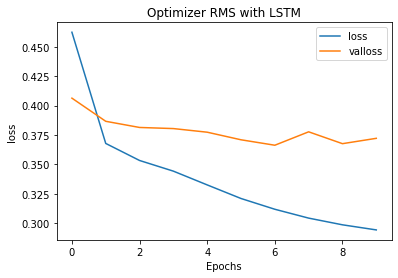

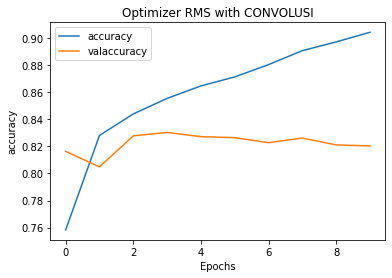

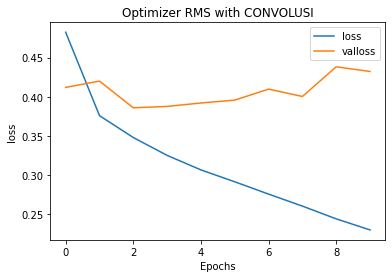

In [32]:
drawGraph("Optimizer ADAM with LSTM", history_lstm_adam, 'accuracy')
drawGraph("Optimizer ADAM with LSTM", history_lstm_adam, 'loss')

drawGraph("Optimizer ADAM with CONVOLUSI", history_conv_adam, 'accuracy')
drawGraph("Optimizer ADAM with CONVOLUSI", history_conv_adam, 'loss')

drawGraph("Optimizer SGD with LSTM", history_lstm_sgd, 'accuracy')
drawGraph("Optimizer SGD with LSTM", history_lstm_sgd, 'loss')

drawGraph("Optimizer SGD with CONVOLUSI", history_conv_sgd, 'accuracy')
drawGraph("Optimizer SGD with CONVOLUSI", history_conv_sgd, 'loss')

drawGraph("Optimizer RMS with LSTM", history_lstm_rms, 'accuracy')
drawGraph("Optimizer RMS with LSTM", history_lstm_rms, 'loss')

drawGraph("Optimizer RMS with CONVOLUSI", history_conv_rms, 'accuracy')
drawGraph("Optimizer RMS with CONVOLUSI", history_conv_rms, 'loss')